<a href="https://colab.research.google.com/github/MN1973/DataScienceProject/blob/main/4a_Subjectlines_DecisionTree_UV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,pydotplus
from IPython.display import Image,display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import _tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
import bz2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Mandar/Project/"
infile = open(DATA_PATH+'/9M.pkl','rb')
df = pickle.load(infile)

In [ ]:
df.shape

(9569374, 988)

In [ ]:
df.loc[df['nl_open'] < 0, 'nl_open'] = 0
df.loc[df['nl_open'] > 0, 'nl_open'] = 1

In [ ]:
df['nl_open'].value_counts()

0    9273287
1     296087
Name: nl_open, dtype: int64

In [ ]:
df.head()

,login_freq_in_OND21,age_breaks,account_agebreaks,subject,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,...,worth,would,write,x,yamuna,year,yeoor,yet,yr,zero
0,54,35to44yrs,acc11to15yrs,Trading A/c: Lowest Cost Great Offerings,41,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84,45to54yrs,acc6to10yrs,Demat A/c In Just 5 mins,24,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,81,55+yrs,acc15+yrs,Complete family cover in a single plan,38,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,45to54yrs,acc11to15yrs,Limit risk of health complications,34,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76,35to44yrs,acc11to15yrs,Stock market is calling Start investing,40,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df['nl_open']

In [ ]:
colname = df.columns[1]
print(colname)

age_breaks


In [ ]:
X = df.iloc[:, np.r_[6,7,10,16:30,38:49]]
X1 = df.iloc[:, np.r_[4,6,7,10,16:30,38:988]]

In [ ]:
feature_cols = list(X)
print(feature_cols)

['percentage_used', 'sender_name_brand', 'sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity', 'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins', 'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education', 'health', 'real_estate', 'upto19yrs', '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs', 'accupto2', 'acc3to5yrs', 'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs']


In [ ]:
feature_names = ['percentage_used','sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan','bfsi_credit_cards','bfsi_equity','bfsi_fixed_deposit','bfsi_health_ins','bfsi_motor_ins', 'bfsi_mutual_funds','bfsi_personal_loan','bfsi_term_ins','education','health','real_estate','upto19yrs', '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs','accupto2','acc3to5yrs','acc6to10yrs','acc11to15yrs','acc15+yrs']

In [ ]:
class_names = ['nl_open']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(6698561, 28)

In [ ]:
y_train.value_counts()

0    6490948
1     207613
Name: nl_open, dtype: int64

**bold text**# Gini Index

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=5, min_samples_split=15 ,splitter='best')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= clf_gini,
                          param_grid= param_grid,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1', verbose=1)



In [ ]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                              min_samples_split=15,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.02020408163265306,
                                           1: 0.9797959183673469},
                                          {0: 0.04040816326530612,
                                           1: 0.9595918367346938},
                                          {0: 0.06061224489795918,
                                           1: 0.9...
                                           1: 0.5555102040816327},
                                          {0: 0.4646938775510204,
                                           1: 0.5353061224489797},
                                    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

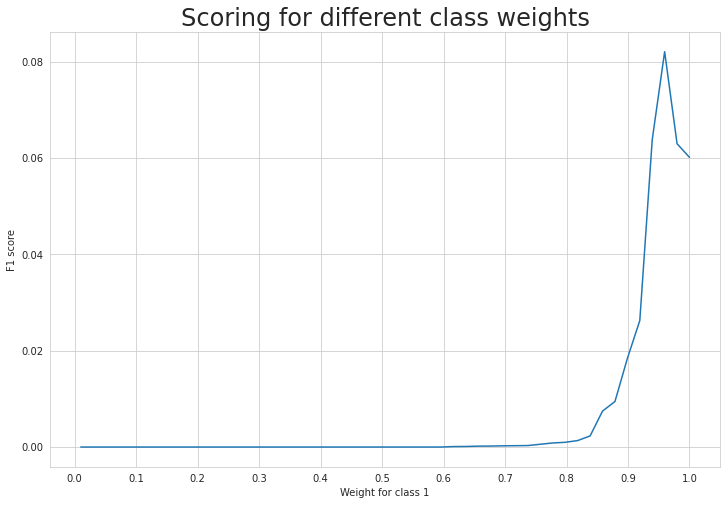

In [ ]:
#Plotting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
#Based on Gini Index (Probability that a tuple in D belongs to class Ci - Classification and Regression Tree - CART)
weights={0:1, 1:19}
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=5, min_samples_split=15 ,splitter='best', class_weight=weights)
clf_gini.fit(X_train, y_train)
y_pred_g=clf_gini.predict(X_test)

In [ ]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_g)*100)


Accuracy is  93.21603322821794


In [ ]:
# print the confusion matrix
cm_gini = metrics.confusion_matrix(y_test, y_pred_g)
print(cm_gini)

NameError: ignored

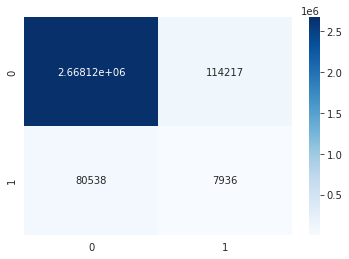

In [ ]:
import seaborn as sns
sns.heatmap(cm_gini, annot=True, cmap='Blues',fmt='g')

In [ ]:
print(classification_report(y_test, y_pred_g))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96   2782339
           1       0.06      0.09      0.08     88474

    accuracy                           0.93   2870813
   macro avg       0.52      0.52      0.52   2870813
weighted avg       0.94      0.93      0.94   2870813



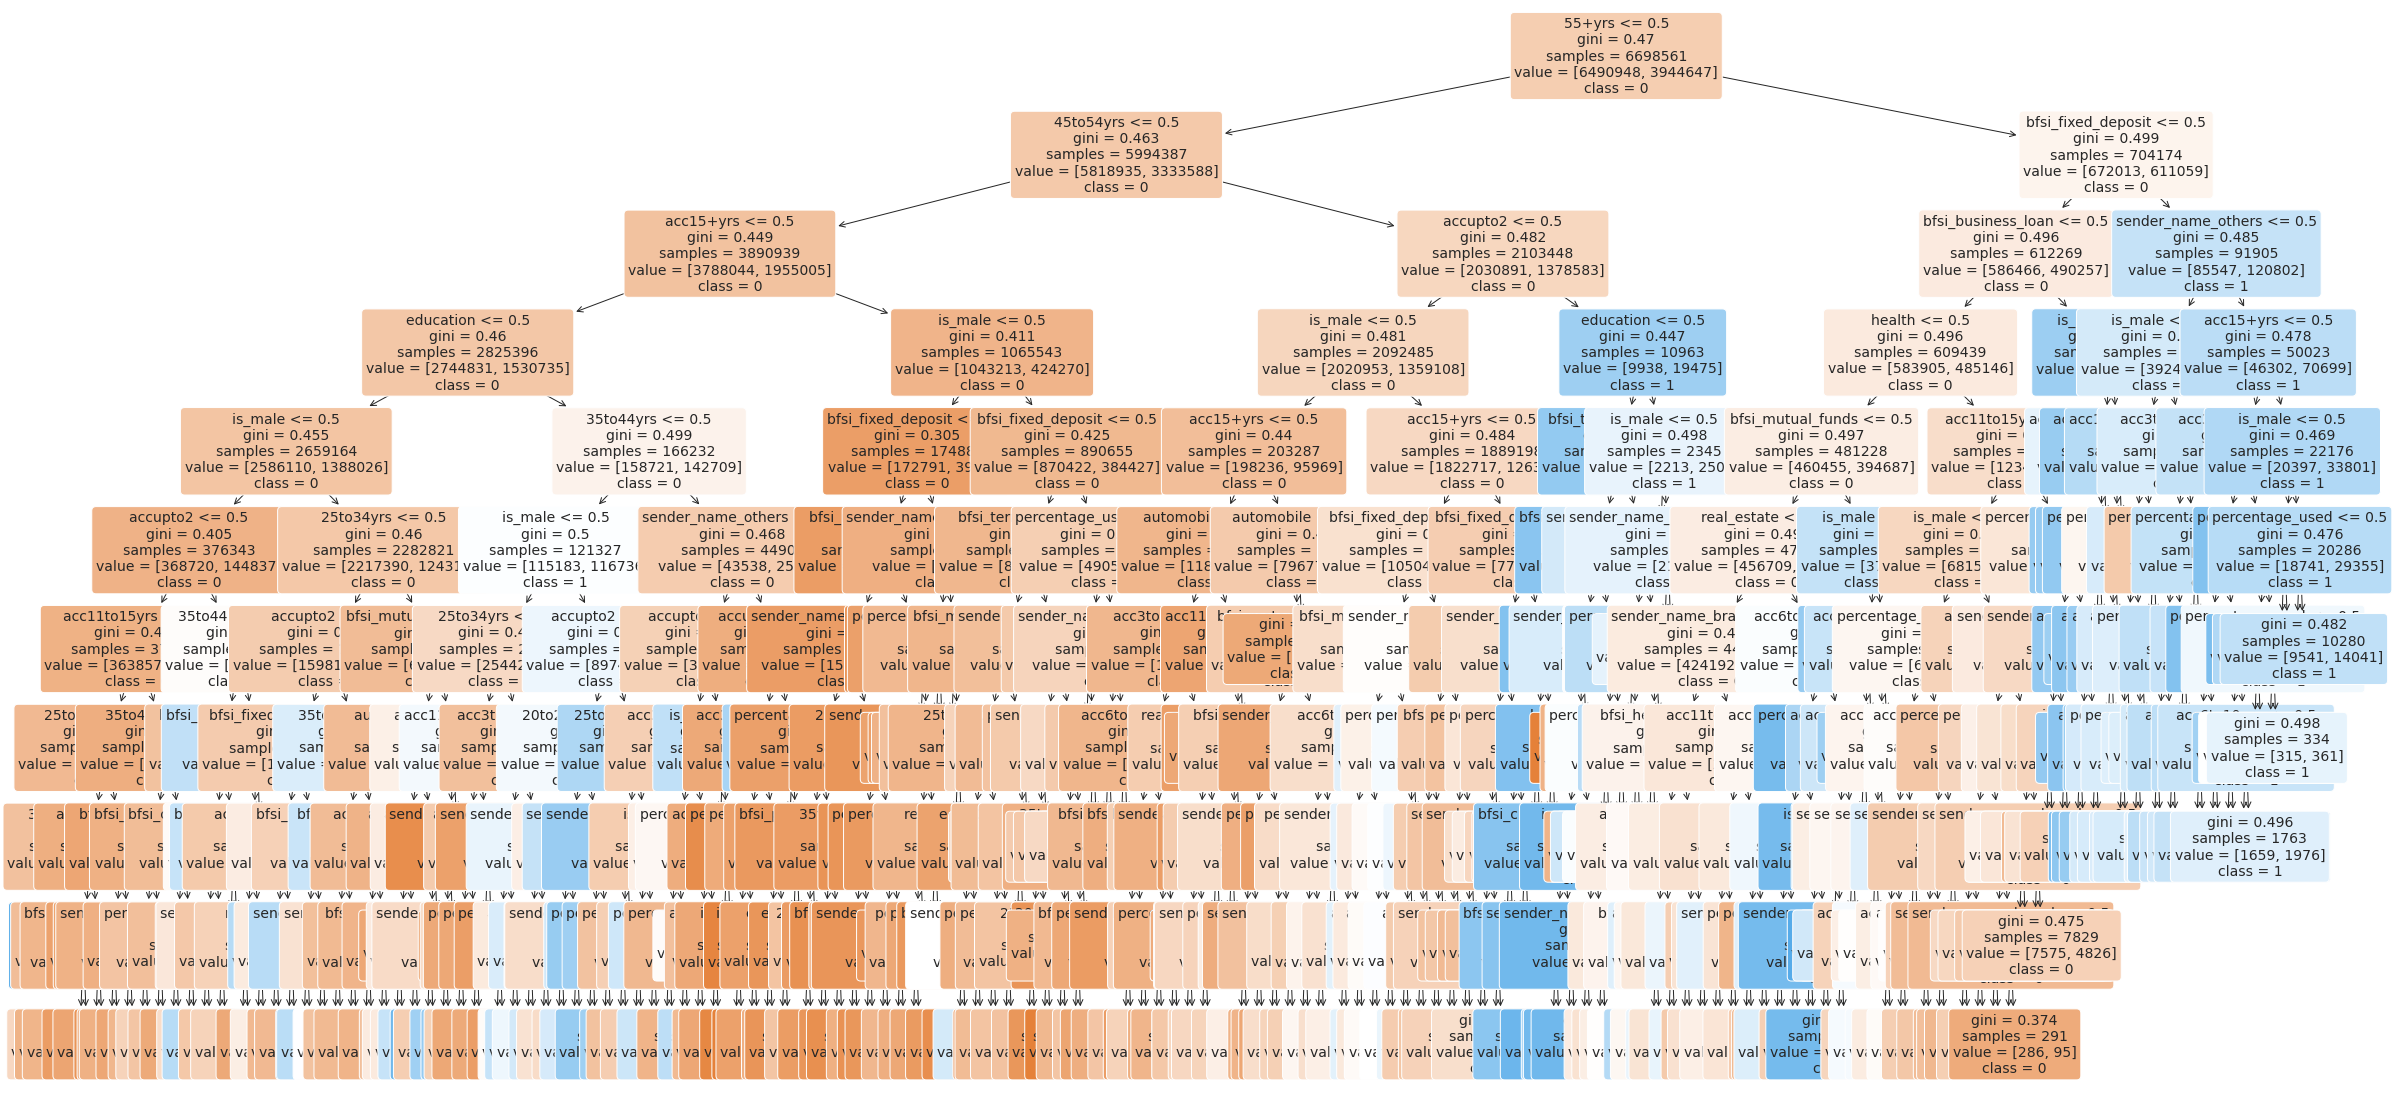

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
a = plot_tree(clf_gini,feature_names = feature_cols,class_names=['0','1'],
              filled=True,
             rounded=True,
             fontsize=14)
plt.savefig("DT_gini.png")

In [ ]:
# get the text representation
text_representation = tree.export_text(clf_gini, feature_names=feature_cols)
print(text_representation)

|--- 55+yrs <= 0.50
|   |--- 45to54yrs <= 0.50
|   |   |--- acc15+yrs <= 0.50
|   |   |   |--- education <= 0.50
|   |   |   |   |--- is_male <= 0.50
|   |   |   |   |   |--- accupto2 <= 0.50
|   |   |   |   |   |   |--- acc11to15yrs <= 0.50
|   |   |   |   |   |   |   |--- 25to34yrs <= 0.50
|   |   |   |   |   |   |   |   |--- 35to44yrs <= 0.50
|   |   |   |   |   |   |   |   |   |--- acc3to5yrs <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- acc3to5yrs >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- 35to44yrs >  0.50
|   |   |   |   |   |   |   |   |   |--- acc6to10yrs <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- acc6to10yrs >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- 25to34yrs >  0.50
|   |   |   |   |   |   |   |   |--- acc3to5yrs <= 0.50
|   |   |   |   |   |   |   |   

In [ ]:
with open("decisition_tree.log", "w") as fout:
    fout.write(text_representation)


In [ ]:
clf_gini.feature_importances_

array([0.00877461, 0.00957389, 0.00767359, 0.1227364 , 0.00728372,
       0.00512966, 0.00104632, 0.00039498, 0.0842701 , 0.00295176,
       0.00229418, 0.01523775, 0.0004984 , 0.0059893 , 0.07343201,
       0.0089248 , 0.00926292, 0.00093434, 0.0023434 , 0.03846156,
       0.03556753, 0.12649665, 0.20431447, 0.05775502, 0.01195129,
       0.02440822, 0.01821584, 0.11407729])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": clf_gini.feature_importances_
})


In [ ]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
22,55+yrs,0.204314
21,45to54yrs,0.126497
3,is_male,0.122736
27,acc15+yrs,0.114077
8,bfsi_fixed_deposit,0.084270
14,education,0.073432
23,accupto2,0.057755
19,25to34yrs,0.038462
20,35to44yrs,0.035568
25,acc6to10yrs,0.024408


In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [ ]:
rules = get_rules(clf_gini, X_train.columns, y_train)
for r in rules:
    print(r)

if (55+yrs <= 0.5) and (45to54yrs <= 0.5) and (acc15+yrs <= 0.5) and (education <= 0.5) and (is_male > 0.5) and (25to34yrs <= 0.5) and (accupto2 <= 0.5) and (bfsi_fixed_deposit <= 0.5) and (acc6to10yrs <= 0.5) and (35to44yrs > 0.5) then class: 1 (proba: 64.06%) | based on 1,292,528 samples
if (55+yrs <= 0.5) and (45to54yrs > 0.5) and (accupto2 <= 0.5) and (is_male > 0.5) and (acc15+yrs <= 0.5) and (bfsi_fixed_deposit <= 0.5) and (bfsi_mutual_funds <= 0.5) and (acc6to10yrs <= 0.5) and (percentage_used <= 0.5) and (automobile <= 0.5) then class: 1 (proba: 57.56%) | based on 717,457 samples
if (55+yrs <= 0.5) and (45to54yrs <= 0.5) and (acc15+yrs > 0.5) and (is_male > 0.5) and (bfsi_fixed_deposit <= 0.5) and (bfsi_term_ins <= 0.5) and (bfsi_mutual_funds <= 0.5) and (25to34yrs <= 0.5) and (real_estate <= 0.5) and (percentage_used <= 0.5) then class: 1 (proba: 69.92%) | based on 574,131 samples
if (55+yrs <= 0.5) and (45to54yrs > 0.5) and (accupto2 <= 0.5) and (is_male > 0.5) and (acc15+yrs

# Entropy

Entropy

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=10, min_samples_leaf=5, min_samples_split=15 ,splitter='best')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_en = GridSearchCV(estimator= clf_gini,
                          param_grid= param_grid,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1', verbose=1)



In [ ]:
gridsearch_en.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 19},
                                              max_depth=10, min_samples_leaf=5,
                                              min_samples_split=15,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.02020408163265306,
                                           1: 0.9797959183673469},
                                          {0: 0.04040816326530612,
                                           1: 0.9595918367346938},
                                          {0: 0...
                                           1: 0.5555102040816327},
                                          {0: 0.4646938775510204,
                                           1: 0.5353061224489797},
                               

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

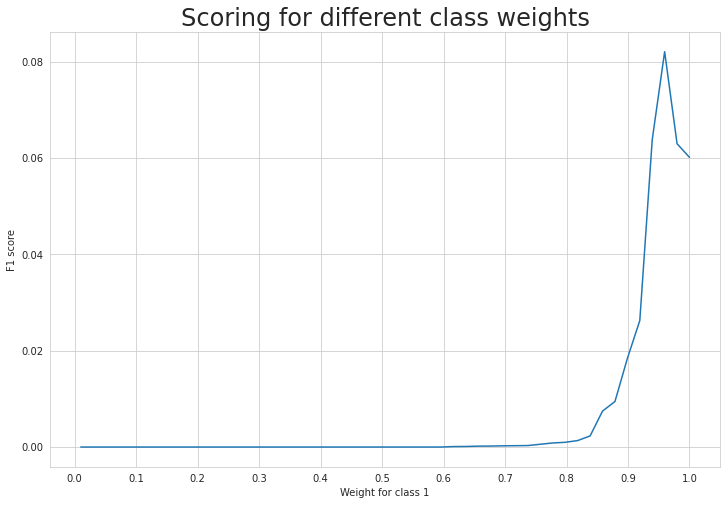

In [ ]:
#Plotting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch_en.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
#Based on Entropy
weights={0:1, 1:19}
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                                     max_depth=27, min_samples_leaf=5, min_samples_split=15 ,splitter='best',class_weight=weights)
clf_entropy.fit(X_train, y_train)
y_pred_g=clf_entropy.predict(X_test)

In [ ]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_g)*100)

Accuracy is  92.5225014656127


In [ ]:
# print the confusion matrix
cm_entropy = metrics.confusion_matrix(y_test, y_pred_g)
print(cm_entropy)

[[2646769  135570]
 [  79095    9379]]


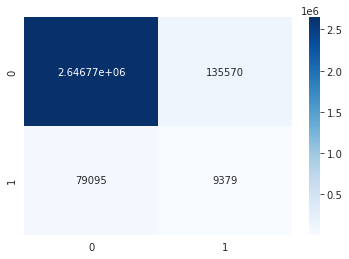

In [ ]:
import seaborn as sns
sns.heatmap(cm_entropy, annot=True, cmap='Blues',fmt='g')

In [ ]:
print(classification_report(y_test, y_pred_g))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96   2782339
           1       0.06      0.11      0.08     88474

    accuracy                           0.93   2870813
   macro avg       0.52      0.53      0.52   2870813
weighted avg       0.94      0.93      0.93   2870813



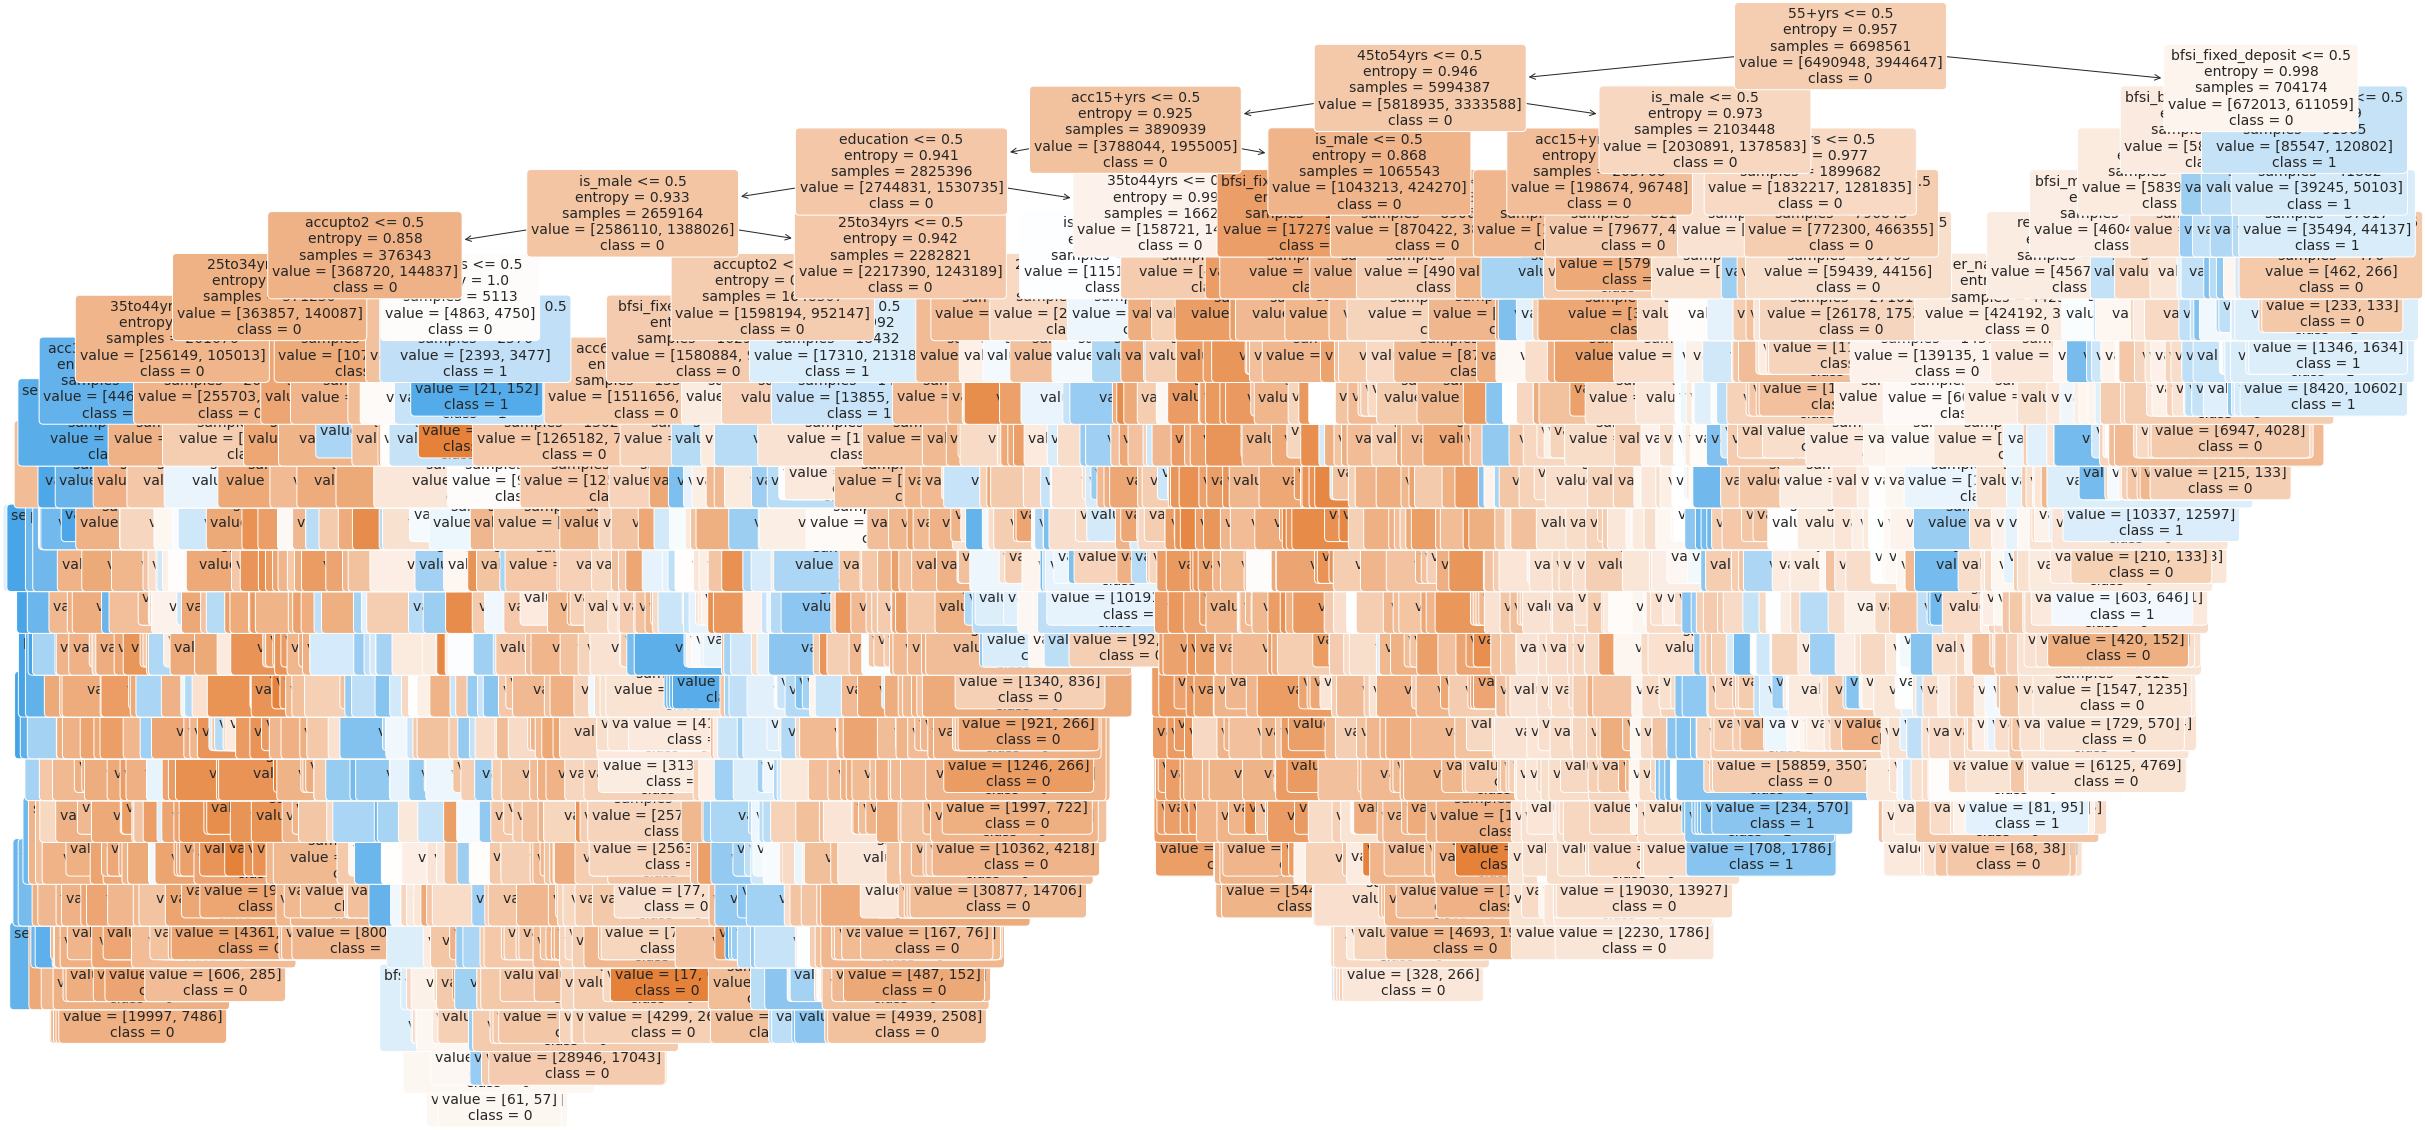

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
a = plot_tree(clf_entropy,feature_names = feature_cols,class_names=['0','1'],
              filled=True,
              rounded=True,
              fontsize=14)
plt.savefig("DT_entropy.png")

In [ ]:
# get the text representation
text_representation = tree.export_text(clf_entropy, feature_names=feature_cols)
print(text_representation)

|--- 55+yrs <= 0.50
|   |--- 45to54yrs <= 0.50
|   |   |--- acc15+yrs <= 0.50
|   |   |   |--- education <= 0.50
|   |   |   |   |--- is_male <= 0.50
|   |   |   |   |   |--- accupto2 <= 0.50
|   |   |   |   |   |   |--- 25to34yrs <= 0.50
|   |   |   |   |   |   |   |--- 35to44yrs <= 0.50
|   |   |   |   |   |   |   |   |--- acc3to5yrs <= 0.50
|   |   |   |   |   |   |   |   |   |--- acc6to10yrs <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- percentage_used <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- percentage_used >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- acc6to10yrs >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- acc3to5yrs >  0.50
|   |   |   |   |   |   |   |   |   |--- sender_name_brand <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- bfsi_term_ins <= 0.50
|   |   |   |  

In [ ]:
clf_entropy.feature_importances_

array([0.02244833, 0.02087083, 0.01121317, 0.11101893, 0.01218558,
       0.00848965, 0.00805721, 0.00666262, 0.06945178, 0.00716139,
       0.00709677, 0.01687272, 0.00732254, 0.01306682, 0.06236471,
       0.01607649, 0.01421433, 0.00322877, 0.00374816, 0.03512407,
       0.02980984, 0.10559191, 0.16508637, 0.04859826, 0.02178426,
       0.03455413, 0.03541943, 0.10248092])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": clf_entropy.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
22,55+yrs,0.165086
3,is_male,0.111019
21,45to54yrs,0.105592
27,acc15+yrs,0.102481
8,bfsi_fixed_deposit,0.069452
14,education,0.062365
23,accupto2,0.048598
26,acc11to15yrs,0.035419
19,25to34yrs,0.035124
25,acc6to10yrs,0.034554


In [ ]:
rules = get_rules(clf_entropy, X_train.columns, y_train)
for r in rules:
    print(r)

if (55+yrs <= 0.5) and (45to54yrs > 0.5) and (is_male > 0.5) and (acc15+yrs <= 0.5) and (accupto2 <= 0.5) and (bfsi_fixed_deposit <= 0.5) and (bfsi_mutual_funds <= 0.5) and (acc6to10yrs <= 0.5) and (percentage_used <= 0.5) and (automobile <= 0.5) and (sender_name_brand > 0.5) and (education > 0.5) and (acc11to15yrs > 0.5) then class: 1 (proba: 57.03%) | based on 155,596 samples
if (55+yrs <= 0.5) and (45to54yrs <= 0.5) and (acc15+yrs <= 0.5) and (education <= 0.5) and (is_male > 0.5) and (25to34yrs <= 0.5) and (accupto2 <= 0.5) and (bfsi_fixed_deposit <= 0.5) and (acc6to10yrs <= 0.5) and (35to44yrs > 0.5) and (acc3to5yrs <= 0.5) and (acc11to15yrs > 0.5) and (bfsi_mutual_funds <= 0.5) and (percentage_used <= 0.5) and (automobile <= 0.5) and (real_estate <= 0.5) and (bfsi_term_ins > 0.5) and (sender_name_brand > 0.5) then class: 1 (proba: 63.62%) | based on 132,722 samples
if (55+yrs <= 0.5) and (45to54yrs > 0.5) and (is_male > 0.5) and (acc15+yrs > 0.5) and (bfsi_fixed_deposit <= 0.5) a